# Проект для «Викишоп» с TF-IDF

**Описание проекта**

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Цель проекта**

Обучить модель машинного обучения классифицировать комментарии на позитивные и негативные для поиска токсичных комментариев и отправки их на модерацию.

**План работы**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. 

Признаки:
- `'text'` — текст комментария, 
- `'toxic'` — является ли комментарий токсичным (целевой признак).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Создание-функций" data-toc-modified-id="Создание-функций-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание функций</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Удаление-столбца" data-toc-modified-id="Удаление-столбца-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление столбца</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Чистка-и-лемматизация-текста" data-toc-modified-id="Чистка-и-лемматизация-текста-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Чистка и лемматизация текста</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Подготовка-моделей" data-toc-modified-id="Подготовка-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка

### Импорт библиотек

In [1]:
import os
import re
import nltk
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML
from nltk import (
    pos_tag, 
    word_tokenize
)
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm
from sklearn.model_selection import (
    train_test_split,
    cross_validate
)
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
# Добавление методов tqdm для Pandas
tqdm.pandas()

In [3]:
# Загрузка пакета тегов частей речи
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Установка максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

In [5]:
# Сохранение списка англоязычных стоп-слов
stopwords = set(stopwords.words('english'))

In [6]:
RANDOM_STATE = 12345

### Создание функций

Создадим функции, которые нам потребуются в работе.

In [7]:
# Функция для предварительного изучения 
# общей информации о данных.  
def data_research(dataset):
    
    
    # Отображение 5 первых и последних строк.
    display(dataset.head())
    display(dataset.tail())
    print()
    
    
    # Отображение информации о данных.
    display(HTML('<h3>Общая информация о данных</h3><br>'))
    print(dataset.info())
    
    
    # Отображение списка наименования столбцов.
    display(HTML('<h3>Наименования столбцов</h3><br>'))
    print(dataset.columns)
 

    # Проверка на пропуски и их изучение.
    display(HTML('<br><h3>Количество и доля пропущенных значений</h3><br>'))
    
    if dataset.isna().sum().any():

        display(HTML(
            f'<b>Количество пропусков во всем датафрейме: </b>'\
            f'{dataset.isna().sum().sum()} '\
            f'({round((dataset.isna().sum().sum() / (dataset.shape[0] * dataset.shape[1]) * 100), 1)}%)<br>')
               )
        
        display(HTML(
            f'<b>Записи, имеющие хотя бы один пропуск: </b>'\
            f'{dataset[dataset.columns].isna().any(axis=1).sum()} '\
            f'({round((dataset[dataset.columns].isna().any(axis=1).sum() / dataset.shape[0] * 100), 1)}%)<br>')
               )
               
        display(HTML('<b>Количество пропусков в каждом столбце: </b>'))
        display(pd.DataFrame({
            'count': dataset.isna().sum(),
            '%': dataset.isna().mean() * 100
            }).style.set_precision(1).background_gradient('coolwarm'))
    
    else:
        print('Пропуски отсутствуют')
    
    
    # Проверка на явные дубликаты.
    display(HTML('<br><h3>Количество дубликатов в датафрейме</h3><br>'))
    
    if dataset.duplicated().sum() != 0:

        print(f'Всего: {dataset.duplicated().sum()} '
              f'({(dataset.duplicated().sum() / dataset.shape[0]):.2%} '\
              f'от общего размера)')
        
    else:
        print('Явные дубликаты отсутствуют')
        
        
    # Проверка уникальных значений признаков.
    display(HTML('<br><h3>Уникальные значения в датафрейме</h3><br>'))    

    display(HTML(f'<b>Уникальные значения в столбце "toxic": </b>'\
                 f'{len(dataset["toxic"].unique())}'))
            
    print(dataset['toxic'].value_counts().to_string(header=False))
    
        
    if len(dataset.select_dtypes(include=[np.number]).columns) != 0:

        # Изучение информации о количественных данных.
        display(HTML('<br><h3>Описание данных</h3>'))
        display(dataset.describe())
        
        # Построение графиков для количественных данных.
        display(HTML('<br><h3>Гистограммы для всех числовых столбцов</h3><br>'))
        dataset.hist(figsize=(12, 5));
        plt.tick_params(axis='x', rotation=90)
        plt.show()
   
    else:
        pass

### Загрузка данных

Загружаем данные из csv-файла в датафрейм.

In [8]:
pth1 = '/datasets/toxic_comments.csv'
pth2 = r'C:\Users\oleg_\Downloads/toxic_comments.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
    
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
    
else:
    print('Не удалось загрузить данные')

### Изучение общей информации

Изучим информацию при помощи функции `data_research`.

,Unnamed: 0,text,toxic
0,0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,4,"You, sir, are my hero. Any chance you remember what page that's on?",0


,Unnamed: 0,text,toxic
159287,159446,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0
159288,159447,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0
159290,159449,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0
159291,159450,"""\nAnd ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes """"you have bad ideas"""" go away, instead of helping rewrite them. """,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None


Index(['Unnamed: 0', 'text', 'toxic'], dtype='object')


Пропуски отсутствуют


Явные дубликаты отсутствуют


0    143106
1     16186


,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


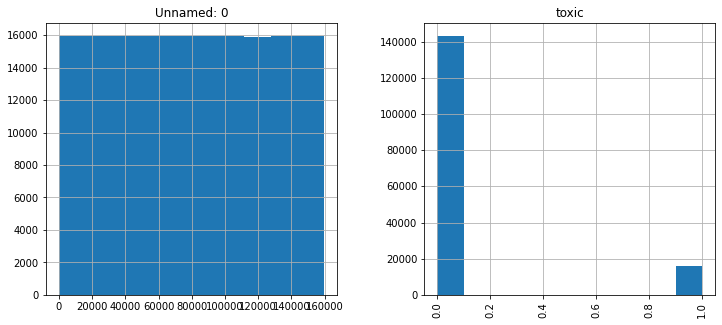

In [9]:
data_research(data)

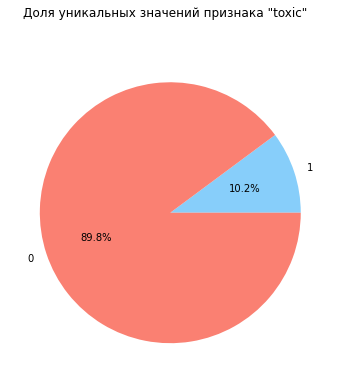

In [10]:
sorted_counts = data['toxic'].value_counts(ascending=True)

plt.figure(figsize=(6, 6))
plt.suptitle('Доля уникальных значений признака "toxic"')

# Создание круговой диаграммы
plt.pie(sorted_counts.values, 
        labels=sorted_counts.index, 
        colors=['lightskyblue', 'salmon'], 
        autopct='%1.1f%%')

# Отображение диаграммы
plt.show()

### Вывод

Данные загружены, они соответствуют описанию задачи. Пропуски и явные дубликаты отсутствуют.

Всего у нас представлено 159 292 записей о комментариях пользователей интернет-магазина на английском языке. Лишь 10.2% из этих комментариев являются токсичными. 

Столбец `'Unnamed: 0'` не имеет важной информации и не понадобится для обучения модели, поэтому его нужно удалить.

Столбец `'toxic'` имеет лишь 2 уникальных значения - 0 и 1. Для оптимизации работы модели лучше перевести тип данных с `int64` на `uint8`.

[Вернуться к содержанию](#Содержание)

## Предобработка

### Удаление столбца

Удалим неинформативный признак из датафрейма.

In [11]:
data = data.drop('Unnamed: 0', axis=1)

После удаления столбца проверим данные еще раз на наличие явных дубликатов.

In [12]:
print('Количество дубликатов', data['text'].duplicated().sum())

Количество дубликатов 0


### Изменение типа данных

Изменим тип данных признака `'toxic'` на `uint8`.

In [13]:
data['toxic'] = data['toxic'].astype('uint8')

Проверяем результат.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 1.4+ MB


### Чистка и лемматизация текста

Создадим функцию `clear_lemm_text`, которая очистит текст от всех символов, кроме латинских букв, а также лемматизирует его.

In [15]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def clear_lemm_text(text):
    clear_text = re.sub(r"[^a-zA-Z']", ' ', text).lower()
    return ' '.join(wnl.lemmatize(word, pos=penn2morphy(tag)) 
                    for word, tag in pos_tag(word_tokenize(clear_text)))

Перед использованием на всем датафрейме проверим функцию на небольшом тексте.

In [16]:
text = "She's been observing birds building nests."

print('Исходный текст:\n', text)
print()
print('Обработанный текст:\n', clear_lemm_text(text))

Исходный текст:
 She's been observing birds building nests.

Обработанный текст:
 she 's be observe bird building nest


Функция работает корректно. При помощи нашей функции добавим в датафрейм новый признак `'lemm_text'`с очищенным и лемматизированным текстом.

In [17]:
data = data.copy()

start_time = time.time()
data['lemm_text'] = data['text'].progress_apply(clear_lemm_text)
lemm_time = time.time() - start_time

print(f"Время выполнения для nltk: {lemm_time:.0f} секунд ({lemm_time/60:.2f} минут)")

  0%|          | 0/159292 [00:00<?, ?it/s]

Время выполнения для nltk: 603 секунд (10.05 минут)


Проверяем результат.

In [18]:
data.head()

,text,toxic,lemm_text
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,explanation why the edits make under my username hardcore metallica fan be revert they be n't vandalisms just closure on some gas after i vote at new york doll fac and please do n't remove the template from the talk page since i 'm retire now
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,d'aww he match this background colour i 'm seemingly stick with thanks talk january utc
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,hey man i 'm really not try to edit war it 's just that this guy be constantly remove relevant information and talk to me through edits instead of my talk page he seem to care more about the formatting than the actual info
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,more i ca n't make any real suggestion on improvement i wonder if the section statistic should be later on or a subsection of type of accident i think the reference may need tidy so that they be all in the exact same format ie date format etc i can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let me know there appear to be a backlog on article for review so i guess there may be a delay until a reviewer turn up it 's list in the relevant form eg wikipedia good article nomination transport
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,you sir be my hero any chance you remember what page that 's on


### Вывод

На этапе предобработки мы сделали следующее:

- удалили признак `'Unnamed: 0'`б т.к. он не понадобится для обучения модели.

- тип данных в столбце `'toxic'` мы перевели с `int64` на `uint8` для оптимизации работы модели.

- выполнили чистку текста от всех символов, кроме латинских букв, а также его лемматизацию при помощи WordNetLemmatizer.

[Вернуться к содержанию](#Содержание)

## Обучение

### Подготовка данных

Делим признаки на входные и целевой.
В качестве входного признака оставим только `'lemm_text'`.

In [19]:
X = data['lemm_text']
y = data['toxic']

Разбиваем признаки на тренировочные и тестовые выборки в соотношении 90/10.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.1,
    stratify=y,
    random_state=RANDOM_STATE
)

Проверим корректность разделения получившихся выборок.

In [21]:
for sample_name in ['X_train', 'X_test',
                   'y_train', 'y_test']:
    
    sample = eval(sample_name)
    print(f'Размер выборки {sample_name}: {sample.shape}')

Размер выборки X_train: (143362,)
Размер выборки X_test: (15930,)
Размер выборки y_train: (143362,)
Размер выборки y_test: (15930,)


Т.к. в датафрейме присутствует дисбаланс классов в целевой переменной, необходимо проверить, корректно ли были распределены между выборками уникальные значения.

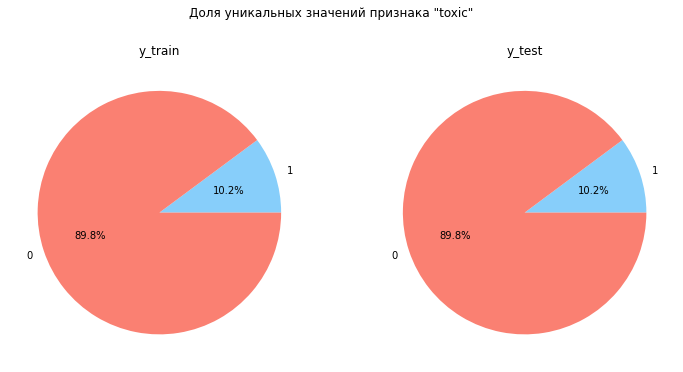

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Доля уникальных значений признака "toxic"')

# Строим круговую диаграмму по каждому датафрейму
for i, sample_name in enumerate(['y_train', 'y_test']):
    sample = eval(sample_name)
    sorted_counts = sample.value_counts(ascending=True)
    
    axes[i].pie(sorted_counts.values, 
                labels=sorted_counts.index, 
                colors=['lightskyblue', 'salmon'], 
                autopct='%1.1f%%')
    
    axes[i].set_title(sample_name)

plt.show()

Значения распределены равномерно, поэтому мы можем приступать к подготовке моделей.

### Подготовка моделей

Для обучения мы подготовим следующие модели:
- `LinearRegression`,
- `RandomForestRegressor`,
- `DecisionTreeRegressor`.

In [23]:
models = [
    (
        'LogisticRegression', 
        LogisticRegression
        (
            solver='liblinear',
            penalty='l1',
            C=2, 
            class_weight='balanced',
            random_state=RANDOM_STATE
        )
    ),
    
    (
        'DecisionTreeClassifier', 
        DecisionTreeClassifier
        (
            max_depth=100, 
            min_samples_split=10, 
            class_weight='balanced',
            random_state=RANDOM_STATE
        )
    ),
    
    (
        'RandomForestClassifier', 
        RandomForestClassifier
        (
            n_estimators=20, 
            min_samples_split=30, 
            class_weight='balanced',
            random_state=RANDOM_STATE
        )
    )
]

Создадим таблицу, в которой мы будем сохранять результаты моделей.

In [24]:
results = pd.DataFrame(columns=['Model', 
                                'Training Time', 
                                'Prediction Time',
                                'F1'])

Создадим словарь для хранения обученных моделей.

In [25]:
trained_models = {}

### Обучение моделей

Обучим модели в цикле с кроссвалидацией при помощи пайплайна с преобразованием текста в TF-IDF векторы с исключением стоп-слов и рассчитаем метрики F1.

In [26]:
for model_name, model in tqdm(models):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stopwords)),
        ('model', model)
    ])
    
    # Кроссвалидация с сохранением обученных моделей
    cv_results = cross_validate(
        pipeline, 
        X_train, 
        y_train, 
        cv=4, 
        scoring='f1', 
        return_train_score=True,
        n_jobs=-1,
        return_estimator=True
    )
    
    # Сохранение обученного пайплайна
    trained_models[model_name] = cv_results['estimator'][0]
    
    # Фиксирование времени и расчет F1
    train_time = round(cv_results['fit_time'].mean(), 2)
    pred_time = round(cv_results['score_time'].mean(), 2)
    f1 = round(cv_results['test_score'].mean(), 4)
    
    # Сохранение результатов
    results = results.append(
        {'Model': model_name, 
         'Training Time': train_time, 
         'Prediction Time': pred_time, 
         'F1': f1}, 
        ignore_index=True)

  0%|          | 0/3 [00:00<?, ?it/s]

### Анализ моделей

Выводим результаты всех моделей.

In [27]:
display(results)

,Model,Training Time,Prediction Time,F1
0,LogisticRegression,11.08,1.59,0.7529
1,DecisionTreeClassifier,67.81,1.64,0.6278
2,RandomForestClassifier,48.52,2.34,0.6744


Модель `LogisticRegression` показала наилучшие результаты среди всех моделей. Значение F1 на кроссвалидации и валидационной выборке превышает порог 0.75, что соответствует условиям задачи. Время обучения и предсказания также являются наименьшими среди всех моделей, что делает её наиболее эффективной и быстрой.

Модель `DecisionTreeClassifier` не достигла порогового значения F1 в 0.75. Время обучения значительно больше по сравнению с `LogisticRegression`, что делает её менее предпочтительной. Однако время предсказания остается на приемлемом уровне.

Модель `RandomForestClassifier` имеет самое низкое значение F1 на кроссвалидации и валидационной выборке. Время обучения и предсказания больше, чем у `LogisticRegression`, что делает её менее эффективной.

По полученным результатам можно сделать вывод, что модель `LogisticRegression` является наилучшей среди рассмотренных моделей. Она не только достигла и превысила пороговое значение F1 в 0.75, но и показала наименьшее время обучения и предсказания.

Оценим работу лучшей модели на тестовой выборке.

In [28]:
# Выводим лучшую модель по результатам кросс-валидации
best_model_name = results.loc[results['F1'].idxmax()]['Model']
best_pipeline = trained_models[best_model_name]

# Проверка лучшей модели на тестовой выборке
test_pred = best_pipeline.predict(X_test)
test_f1 = round(f1_score(y_test, test_pred), 2)

print(f"Лучшая модель: {best_model_name}")
print(f"Значение F1 на тестовой выборке: {test_f1}")

Лучшая модель: LogisticRegression
Значение F1 на тестовой выборке: 0.76


На тестовой выборке лучшая модель показала себя также хорошо, как и на кроссвалидации. 

### Вывод

При подготовке к обучению в качестве входного признака мы оставили только `'lemm_text'`. 

Данные были разбиты на тренировочные и тестовые выборки в соотношении 90/10. Классы целевого признака между выборками распределены равномерно.

Для обучения мы использовали следующие модели:
- `LinearRegression`,
- `RandomForestRegressor`,
- `DecisionTreeRegressor`.

В обучении мы использовали пайплайн с преобразованием текста в TF-IDF векторы с исключением стоп-слов с кроссвалидацией.

Для оценки моделей была использована метрика F1.

---

Результаты анализа моделей:

- Модель `LogisticRegression` показала наилучший результат среди рассмотренных моделей. Она не только достигла и превысила пороговое значение F1 в 0.75, но и затратила наименьшее количество времени для обучения и предсказания.


- Модель `DecisionTreeClassifier` не достигла порогового значения F1 в 0.75. Время обучения значительно больше по сравнению с `LogisticRegression`, что делает её менее предпочтительной. Однако время предсказания остается на приемлемом уровне.


- Модель `RandomForestClassifier` показала самое низкое значение F1. Время обучения и предсказания больше, чем у `LogisticRegression`, что делает её менее эффективной.

[Вернуться к содержанию](#Содержание)

## Общий вывод

**Описание задачи**

В данной проектной работе мы помогли интернет-магазину «Викишоп» построить модель, которая поможет магазину в поиске токсичных комментариев и отправки их на модерацию.

---

**Этапы работы**

<br>

*Загрузка и первичное изучение информации о данных:*

Всего нам было предоставлено 159 292 записей о комментариях пользователей интернет-магазина на английском языке. Лишь 10.2% из этих комментариев являются токсичными. 

<br>

*Предобработка данных:*

В процессе предобработки мы:

- удалили неинформативные признаки.

- изменили тип данных у признака `'toxic'`.

- выполнили чистку текста от всех символов, кроме латинских букв, а также его лемматизацию.

<br>

*Обучение моделей:*

Для задачи мы выбрали 3 модели: `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestRegressor`. 

Наиболее оптимальные значения имеет модель `LogisticRegression` - она показала наилучшее значение F1 на всех этапах (0.75 на кроссвалидации и 0.76 на тестовой выборке), при этом ее время обучения и предсказания является самым быстрым.

---

Таким образом, заказчику рекомендуется использовать модель `LogisticRegression` для классификации комментариев на позитивные и негативные.

[Вернуться к содержанию](#Содержание)